In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns

In [109]:
"""Sobrescrevendo os métodos do pandas_datareader"""
yf.pdr_override()

In [110]:
tickers = "^BVSP ^GSPC GC=F USDBRL=X"
carteira = yf.download(tickers, start="2006-01-01")["Close"]

[*********************100%***********************]  4 of 4 completed


In [111]:
carteira.columns = ["OURO", "DOLAR", "IBOV", "S&P500"]
carteira = carteira.dropna()

In [112]:
carteira["OURO_BRL"]=carteira["OURO"]*carteira["DOLAR"]
carteira["S&P500_BRL"]=carteira["S&P500"]*carteira["DOLAR"]

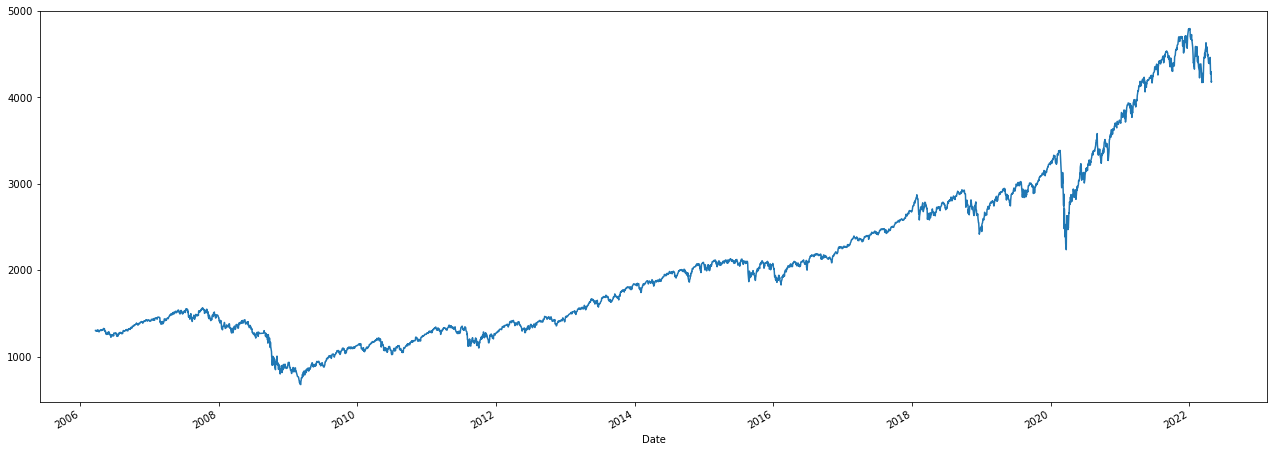

In [113]:
carteira["S&P500"].plot(figsize=(22,8));

In [114]:
retornos = (carteira.pct_change()[1:])*100
retornos

,OURO,DOLAR,IBOV,S&P500,OURO_BRL,S&P500_BRL
Date,,,,,,
2006-03-27,1.250000,-0.204205,0.170317,-0.102841,1.043242,-0.306836
2006-03-28,-0.070551,0.809191,-2.547754,-0.643818,0.738069,0.160162
2006-03-29,1.129549,2.440367,2.208167,0.746970,3.597481,3.205565
2006-03-30,2.390927,-1.278931,0.760162,-0.202628,1.081418,-1.478967
2006-03-31,-0.835184,-1.140400,0.463245,-0.413767,-1.966060,-1.549449
...,...,...,...,...,...,...
2022-04-20,-0.173846,0.279450,-0.619693,-0.061848,0.105118,0.217430
2022-04-22,-1.091023,-0.947480,-2.856293,-4.208376,-2.028166,-5.115982
2022-04-25,-1.957537,3.774235,-0.353805,0.569794,1.742815,4.365534


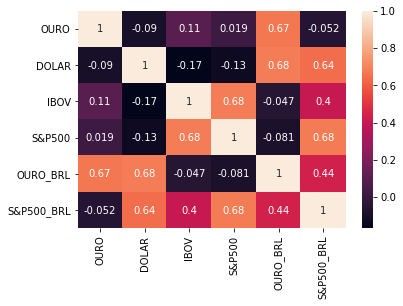

In [115]:
sns.heatmap(retornos.corr(), annot=True);

In [116]:
retornos_acc = ((1 + retornos/100).cumprod() - 1)*100

In [117]:
print(retornos_acc[['OURO_BRL','S&P500_BRL', 'IBOV']].tail(1))

              OURO_BRL  S&P500_BRL        IBOV
Date                                          
2022-04-27  681.128855  644.820854  191.000791


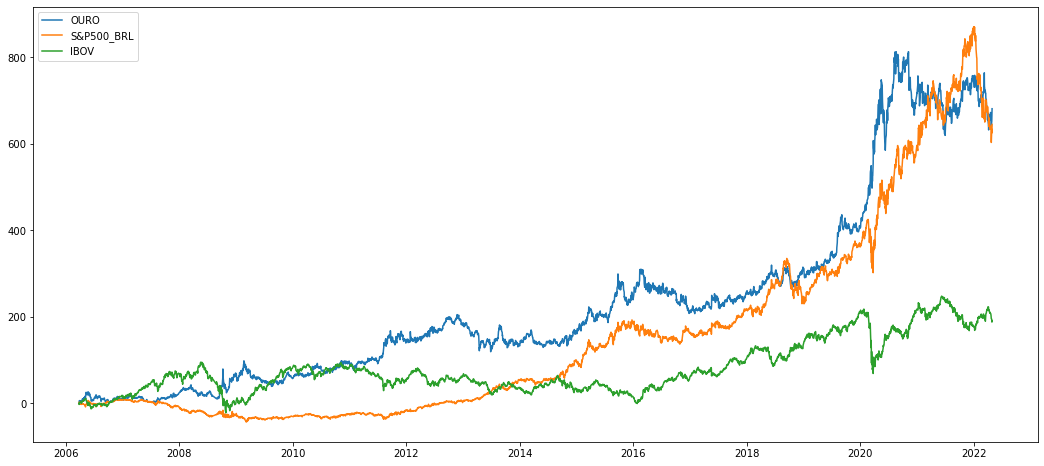

In [118]:
plt.figure (figsize= (18,8))
plt.plot(retornos_acc.index, retornos_acc['OURO_BRL'], label = "OURO") 
plt.plot(retornos_acc.index, retornos_acc['S&P500_BRL'], label = "S&P500_BRL") 
plt.plot(retornos_acc.index, retornos_acc['IBOV'], label = "IBOV") 
plt.legend() 
plt.show()

In [121]:
carteira_10y = carteira[carteira.index.year>=2012]
retornos_10y = (carteira_10y.pct_change()[1:])*100
retornos_acc_10y = ((1 + retornos_10y/100).cumprod() - 1)*100

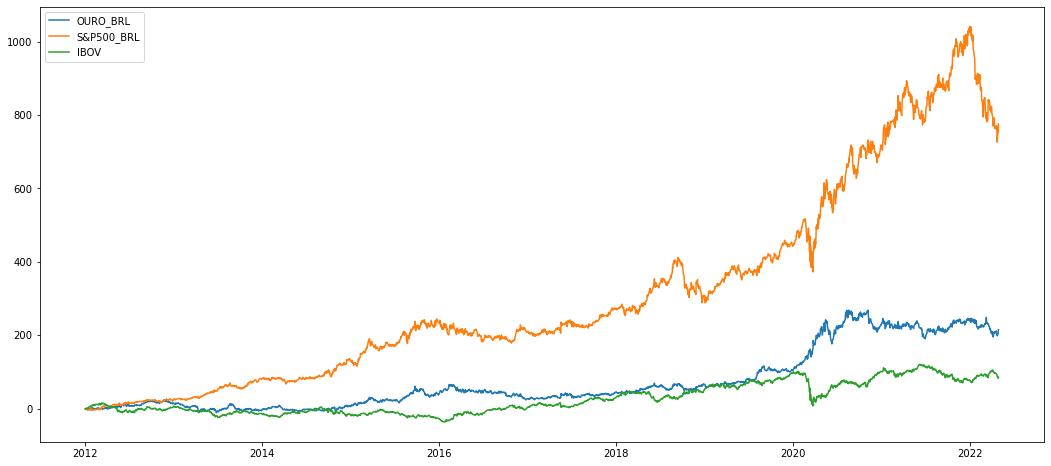

In [124]:
plt.figure (figsize= (18,8))
plt.plot(retornos_acc_10y.index, retornos_acc_10y['OURO_BRL'], label = "OURO_BRL") 
plt.plot(retornos_acc_10y.index, retornos_acc_10y['S&P500_BRL'], label = "S&P500_BRL") 
plt.plot(retornos_acc_10y.index, retornos_acc_10y['IBOV'], label = "IBOV") 
plt.legend() 
plt.show()

In [125]:
carteira_2y = carteira[carteira.index.year>=2020]
retornos_2y = (carteira_10y.pct_change()[1:])*100
retornos_acc_2y = ((1 + retornos_10y/100).cumprod() - 1)*100

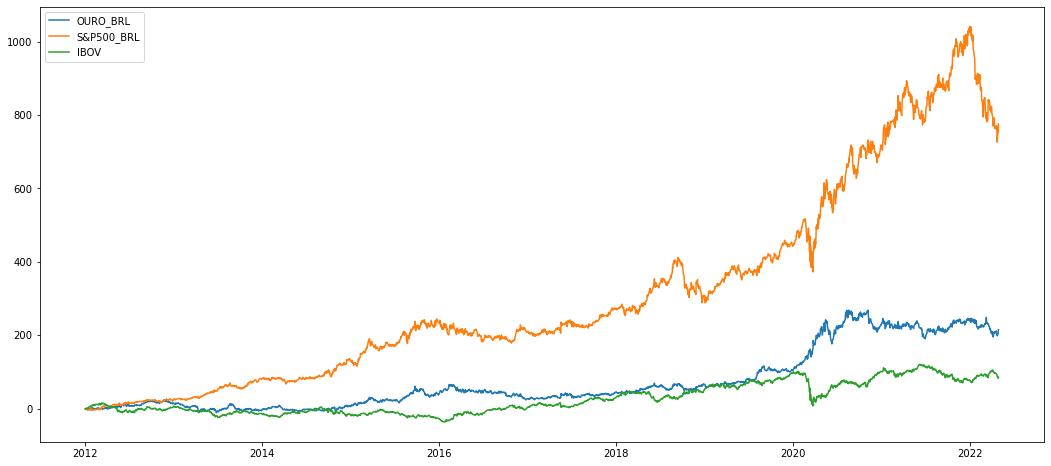

In [126]:
plt.figure (figsize= (18,8))
plt.plot(retornos_acc_2y.index, retornos_acc_10y['OURO_BRL'], label = "OURO_BRL") 
plt.plot(retornos_acc_2y.index, retornos_acc_10y['S&P500_BRL'], label = "S&P500_BRL") 
plt.plot(retornos_acc_2y.index, retornos_acc_10y['IBOV'], label = "IBOV") 
plt.legend() 
plt.show()